**CAR PRICE PREDICTION WITH ML **

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [ ]:
df=pd.read_csv("car data.csv")

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Summary Statistics:

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Data visualisation:

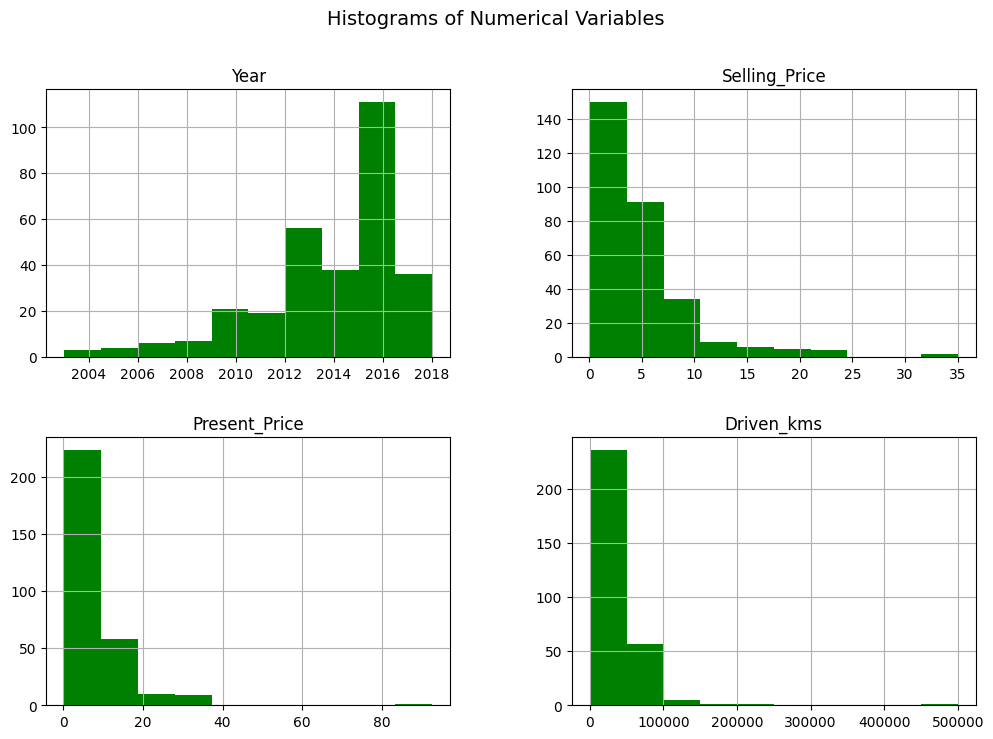

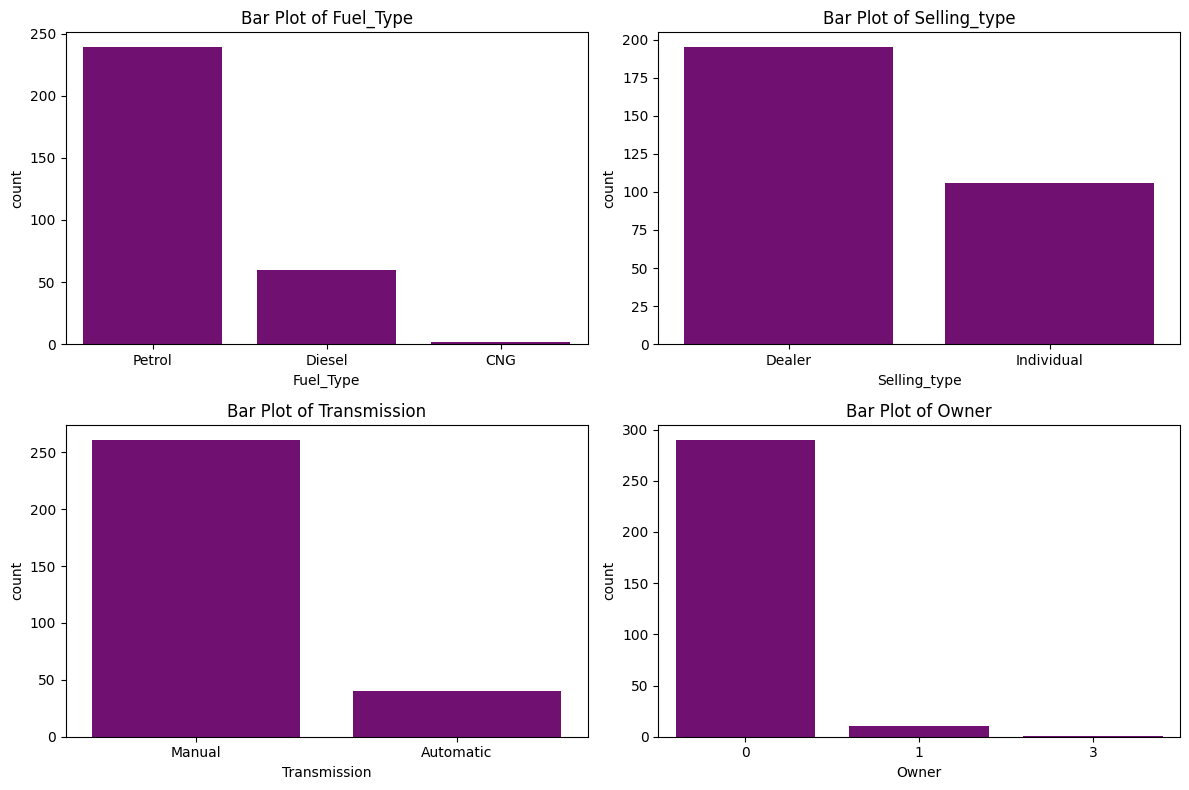

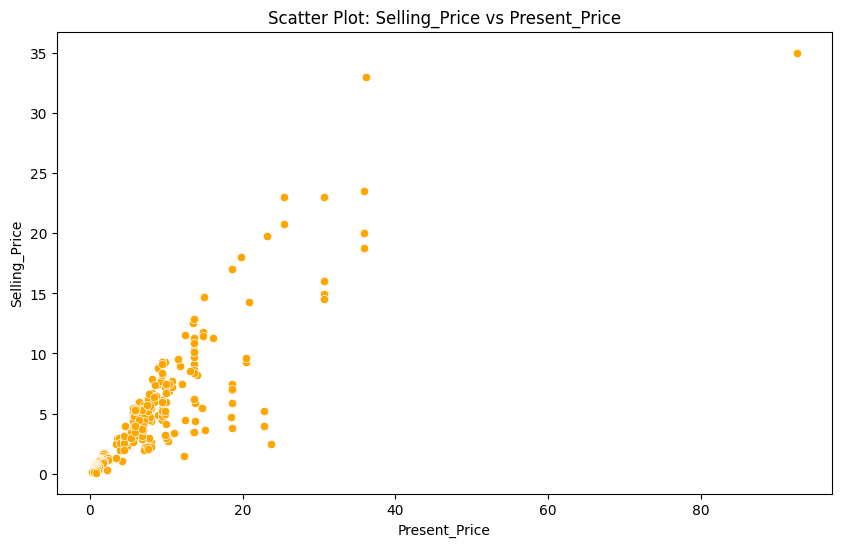

In [ ]:
# histograms for numerical variables
numerical_vars = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']
df[numerical_vars].hist(figsize=(12, 8), color='green')
plt.suptitle('Histograms of Numerical Variables', fontsize=14)
plt.show()

# bar plots for categorical variables
categorical_vars = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
plt.figure(figsize=(12, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, data=df,color='purple')
    plt.title(f'Bar Plot of {var}')
plt.tight_layout()
plt.show()

# scatter plots to explore relationships between numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df,color='orange')
plt.title('Scatter Plot: Selling_Price vs Present_Price')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.show()

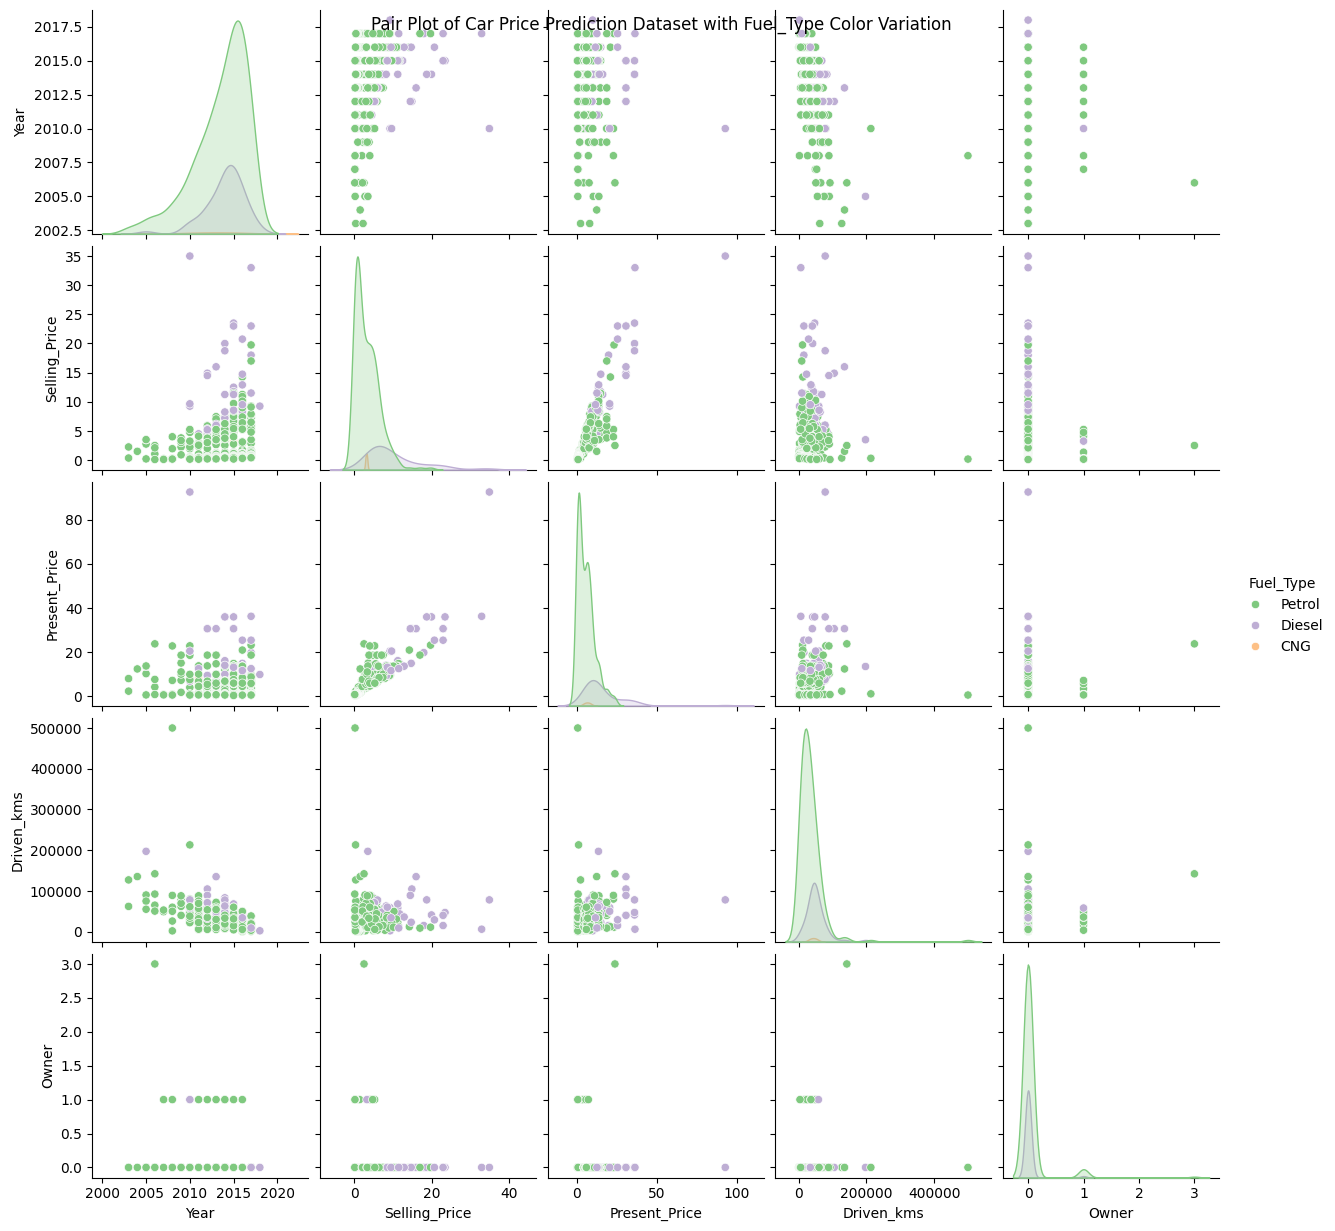

In [ ]:
# Pair plot for data set
sns.pairplot(df, hue='Fuel_Type', palette='Accent')
print("\n")
plt.suptitle('Pair Plot of Car Price Prediction Dataset with Fuel_Type Color Variation\n', fontsize=12)
plt.show()

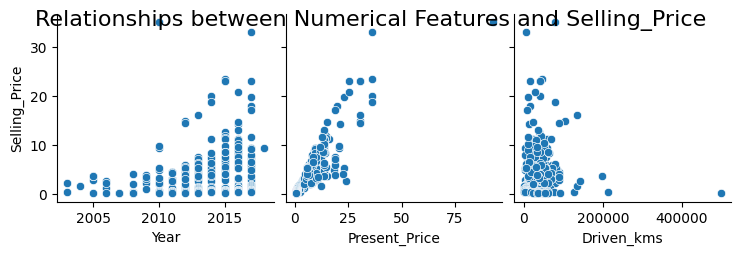

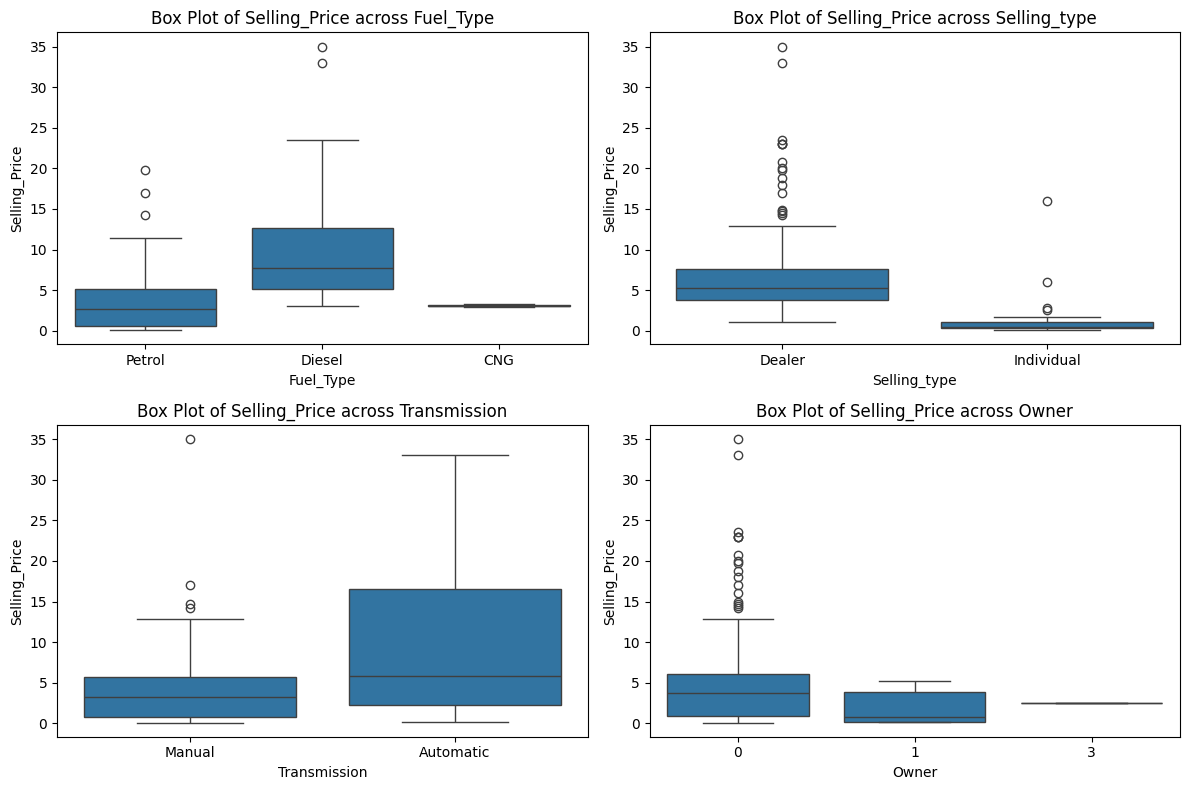

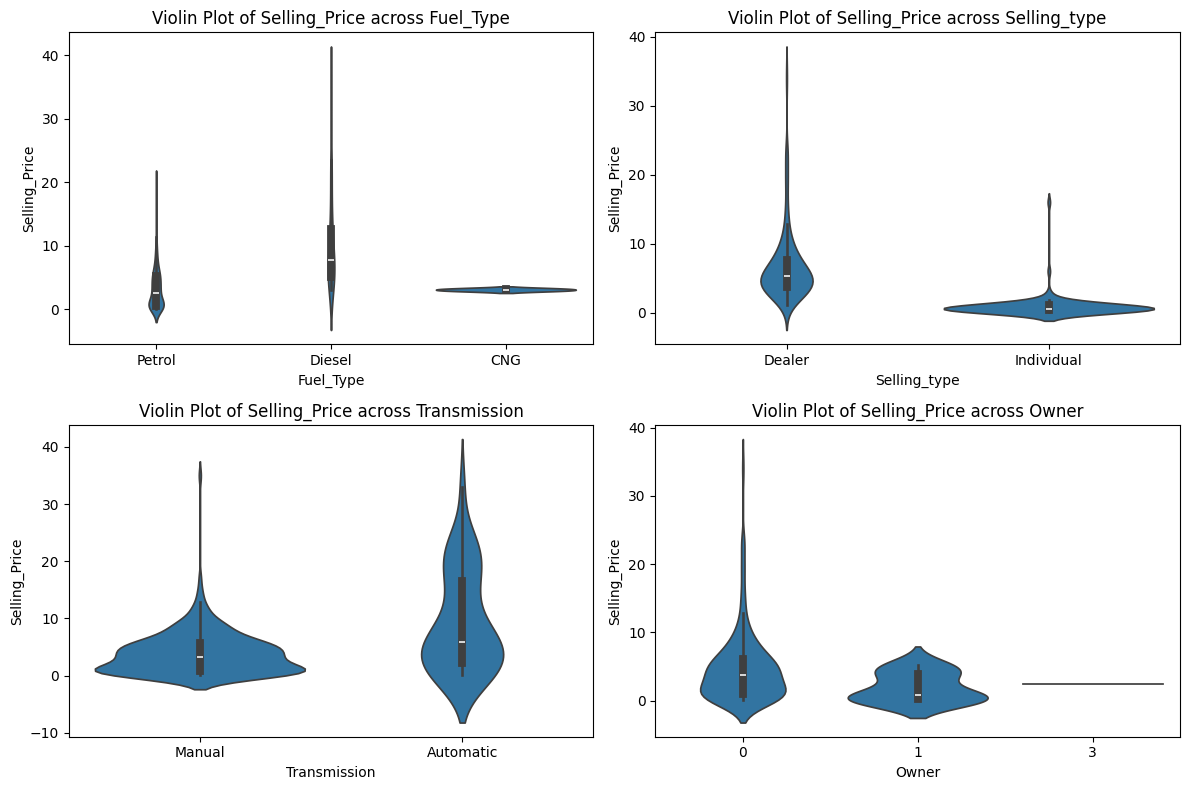

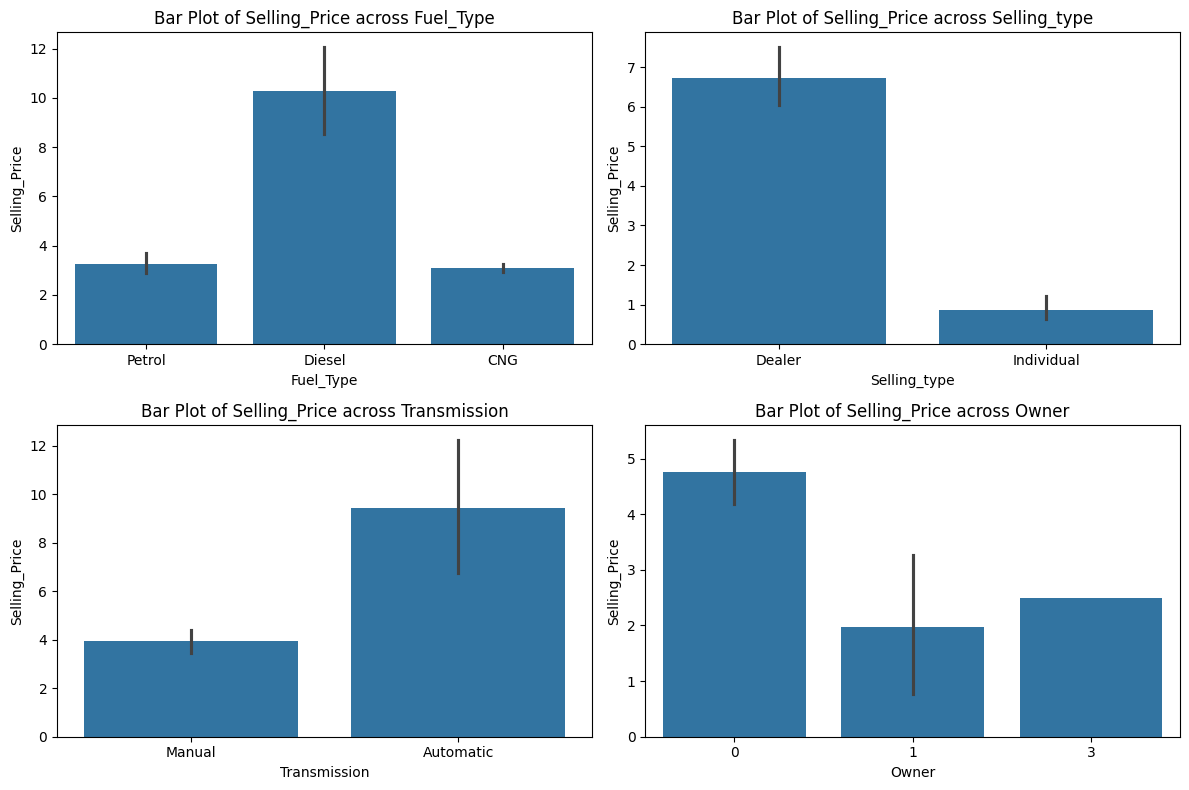

In [ ]:
sns.pairplot(df, x_vars=['Year', 'Present_Price', 'Driven_kms'], y_vars=['Selling_Price'])
plt.suptitle('Relationships between Numerical Features and Selling_Price', fontsize=16)
plt.show()

# Box plot for categorical features
categorical_vars = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
plt.figure(figsize=(12, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, y='Selling_Price', data=df)
    plt.title(f'Box Plot of Selling_Price across {var}')
plt.tight_layout()
plt.show()

# Violin plot for categorical features
plt.figure(figsize=(12, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x=var, y='Selling_Price', data=df)
    plt.title(f'Violin Plot of Selling_Price across {var}')
plt.tight_layout()
plt.show()

# Bar plot for categorical features
plt.figure(figsize=(12, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=var, y='Selling_Price', data=df)
    plt.title(f'Bar Plot of Selling_Price across {var}')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'])

# Feature Engineering
data['Age_of_car'] = 2024 - data['Year']

# Splitting data into features and target variable
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the Random forest regression model
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print("Random Forest Regression Metrics:")
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2_score(y_test, predictions))
print("\n\n")

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)

# EvaluatING Linear Regression model
print("Linear Regression Metrics:")
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Root Mean Squared Error:", mean_squared_error(y_test, lr_predictions, squared=False))
print("R-squared Score:", r2_score(y_test, lr_predictions))
print("\n\n")

# SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

# Predictions
svr_predictions = svr_model.predict(X_test)

# Evaluate SVR model
print("SVR Metrics:")
print("Mean Absolute Error:", mean_absolute_error(y_test, svr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, svr_predictions))
print("Root Mean Squared Error:", mean_squared_error(y_test, svr_predictions, squared=False))
print("R-squared Score:", r2_score(y_test, svr_predictions))

Random Forest Regression Metrics:
Mean Absolute Error: 0.628396721311476
Mean Squared Error: 0.9516003944262298
Root Mean Squared Error: 0.975500074026768
R-squared Score: 0.9586899827270265



Linear Regression Metrics:
Mean Absolute Error: 1.216374019333327
Mean Squared Error: 3.481349830515269
Root Mean Squared Error: 1.8658375680951622
R-squared Score: 0.8488707839191656



SVR Metrics:
Mean Absolute Error: 150.52552594560876
Mean Squared Error: 40870.2140256414
Root Mean Squared Error: 202.16382966703367
R-squared Score: -1773.2208360131704


Random forest:
The Random Forest Regression model achieved relatively low errors and a high R-squared score, indicating a good fit to the data and strong predictive performance. The RMSE of 0.976 suggests that, on average, the model's predictions are approximately 0.976 off from the actual selling prices.

linear regression:
The Linear Regression model exhibits higher errors compared to Random Forest Regression. The R-squared score of 0.849 suggests that the model explains about 84.9% of the variance in the target variable, indicating moderate predictive performance.

SVR:
The SVR model performed significantly worse compared to both Random Forest Regression and Linear Regression. The negative R-squared score indicates that the SVR model fits the data poorly and performs worse than a model that simply predicts the mean of the target variable.


Conclusion:

-Among the three models evaluated, Random Forest Regression demonstrates the best performance, with the lowest errors and highest R-squared score.
-Linear Regression performs moderately well but has higher errors compared to Random Forest Regression.
-SVR performs poorly, with extremely high errors and a negative R-squared score, indicating it is not suitable for this dataset.

**Based on this analysis, Random Forest Regression would be the recommended model for car price prediction tasks, considering its superior performance compared to Linear Regression and SVR.**